# Preparation

In [1]:
!pip3 install pandas
!pip3 install matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import namedtuple

#plt.style.use('seaborn-white')

In [2]:
# helper functions

style_ = namedtuple("style_", ["color", "marker", "linestyle"])

styles = {
    "THRUST" : style_('r', 'v', '-'),
    "CUB" : style_('b', 'o', '-'),
    "CUCO" : style_('g', 'x', '-'),
    "CUCO α=50%" : style_('g', 'x', '-'),
    "CUCO α=80%" : style_('g', 'x', '--')}

def load_csv_files(csv_files):
    dfs = {}
    for key, fname in csv_files.items():
        df = pd.read_csv(fname)
        dfs[key] = df[df["Skipped"] == "No"]
    return dfs

def filter_bench(dfs, query):
    if isinstance(dfs, dict):
        filtered_dfs = {}
        for key in dfs.keys():
            filtered_dfs[key] = dfs[key].query(query)
        return filtered_dfs
    else:
        return dfs.query(query)

def plot_bench(dfs, xlabel, show_legend=True, title=None, ofname=None, show_xlabel=True, show_ylabel=True, log_xscale=False, log_yscale=False, styles=styles, font_size=14):
    fig, ax = plt.subplots(1, 1)

    ax.tick_params(labelsize=font_size)
    if(show_ylabel):
        ax.set_xlabel(xlabel, fontsize=font_size)
    if(show_ylabel):
        ax.set_ylabel("Operations per second", fontsize=font_size)
    if(log_xscale):
        ax.set_xscale('log')
    if(log_yscale):
        ax.set_yscale('log')
    ax.set_title(title, fontsize=font_size)
    ax.grid()

    for key, df in dfs.items():        
        style = styles[key]

        Y = df["NumInputs"].unique()[0]/df["GPU Time (sec)"]

        if xlabel in df.columns:
            X = df[xlabel]
    
            ax.plot(X, Y, label=key, color=style.color, marker=style.marker, linestyle=style.linestyle)
            ax.scatter(X, Y, color=style.color, marker=style.marker, linestyle=style.linestyle)
        else:
            ax.axhline(y=Y.iloc[0], label=key, color=style.color, linestyle=style.linestyle)

    if(show_legend):
        plt.legend(fontsize=font_size - 4)

    if(ofname):
        plt.savefig(ofname, dpi=1200, format='pdf', bbox_inches='tight')

    plt.show()

In [3]:
v100_dfs = load_csv_files({
    "CUCO"   : "../results/cuco_rbk_v100.csv",
    "CUB"    : "../results/cub_rbk_v100.csv",
    "THRUST" : "../results/thrust_rbk_v100.csv"})

a100_dfs = load_csv_files({
    "CUCO"   : "../results/cuco_rbk_a100.csv",
    "CUB"    : "../results/cub_rbk_a100.csv",
    "THRUST" : "../results/thrust_rbk_a100.csv"})

V100 I32/I32 UNIFORM


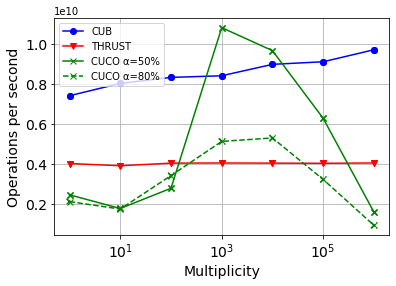

V100 I64/I64 UNIFORM


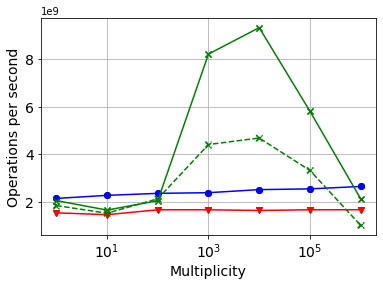

A100 I32/I32 UNIFORM


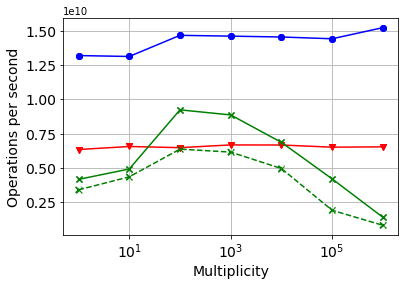

A100 I64/I64 UNIFORM


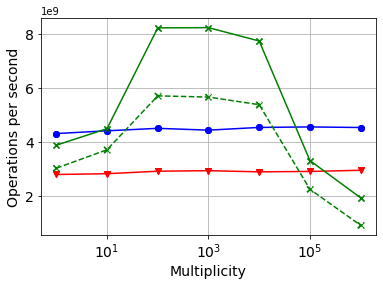

In [4]:
# for CUCO, show distinct traces for load factors of 50% and 80%, respectively
query = 'Distribution == "UNIFORM" and\
         Benchmark.str.contains("multiplicity")'

v100_dfs_mult = filter_bench(v100_dfs, query)
v100_dfs_mult['CUCO α=50%'] = filter_bench(v100_dfs_mult['CUCO'], 'Occupancy == 0.5')
v100_dfs_mult['CUCO α=80%'] = filter_bench(v100_dfs_mult['CUCO'], 'Occupancy == 0.8')
del v100_dfs_mult['CUCO']

a100_dfs_mult = filter_bench(a100_dfs, query)
a100_dfs_mult['CUCO α=50%'] = filter_bench(a100_dfs_mult['CUCO'], 'Occupancy == 0.5')
a100_dfs_mult['CUCO α=80%'] = filter_bench(a100_dfs_mult['CUCO'], 'Occupancy == 0.8')
del a100_dfs_mult['CUCO']


#### RBK
### V100
## Multiplicity
# I32/I32
print("V100 I32/I32 UNIFORM")
query = 'Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(v100_dfs_mult, query), "Multiplicity", log_xscale=True)

# I64/I64
print("V100 I64/I64 UNIFORM")
query = 'Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(v100_dfs_mult, query), "Multiplicity", log_xscale=True, show_legend=False)

###- A100
# I32/I32
print("A100 I32/I32 UNIFORM")
query = 'Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(a100_dfs_mult, query), "Multiplicity", log_xscale=True, show_legend=False)

# I64/I64
print("A100 I64/I64 UNIFORM")
query = 'Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(a100_dfs_mult, query), "Multiplicity", log_xscale=True, show_legend=False)

V100 I32/I32 UNIFORM


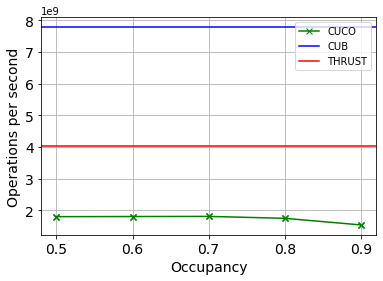

V100 I32/I32 GAUSSIAN


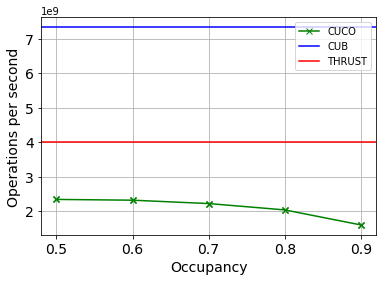

V100 I32/I32 UNIQUE


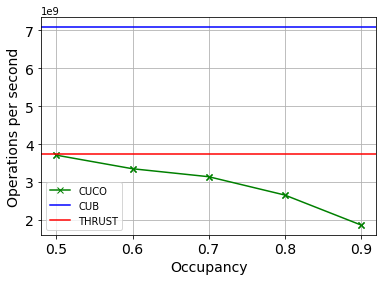

V100 I32/I32 SAME


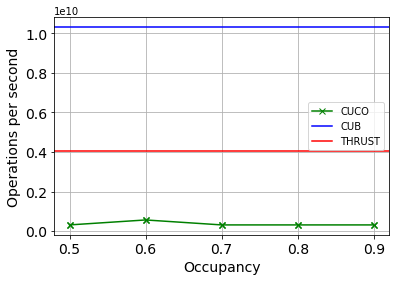

V100 I64/I64 UNIFORM


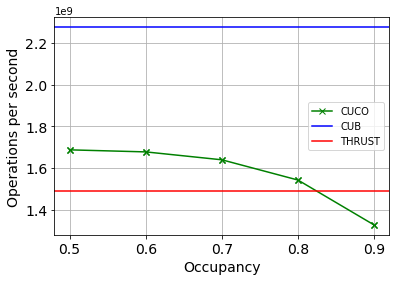

V100 I64/I64 GAUSSIAN


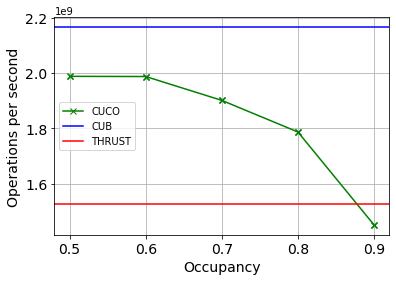

V100 I64/I64 UNIQUE


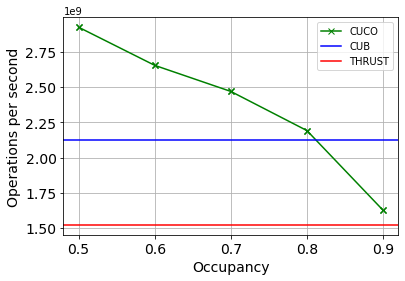

V100 I64/I64 SAME


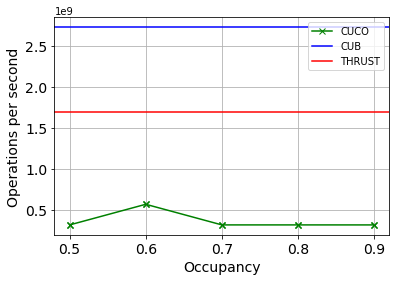

In [5]:
#### RBK
### V100
## Occupancy
# I32/I32
print("V100 I32/I32 UNIFORM")
query = 'Distribution == "UNIFORM" and\
         Key          == "I32" and\
         Value        == "I32" and\
         Benchmark.str.contains("occupancy|distribution")'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I32/I32 GAUSSIAN")
query = 'Distribution == "GAUSSIAN" and\
         Key          == "I32"      and\
         Value        == "I32"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I32/I32 UNIQUE")
query = 'Distribution == "UNIQUE" and\
         Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I32/I32 SAME")
query = 'Distribution == "SAME" and\
         Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

# I64/I64
print("V100 I64/I64 UNIFORM")
query = 'Distribution == "UNIFORM" and\
         Key          == "I64" and\
         Value        == "I64" and\
         Benchmark.str.contains("occupancy|distribution")'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I64/I64 GAUSSIAN")
query = 'Distribution == "GAUSSIAN" and\
         Key          == "I64"      and\
         Value        == "I64"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I64/I64 UNIQUE")
query = 'Distribution == "UNIQUE" and\
         Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

print("V100 I64/I64 SAME")
query = 'Distribution == "SAME" and\
         Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(v100_dfs, query), "Occupancy")

A100 I32/I32 UNIFORM


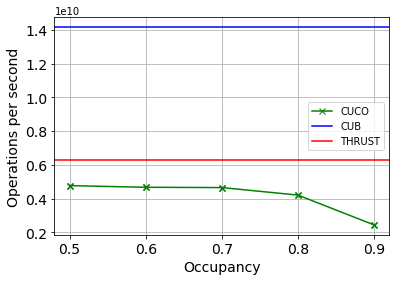

A100 I32/I32 GAUSSIAN


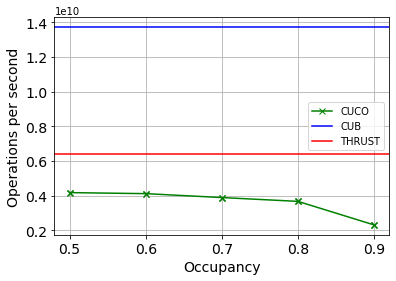

A100 I32/I32 UNIQUE


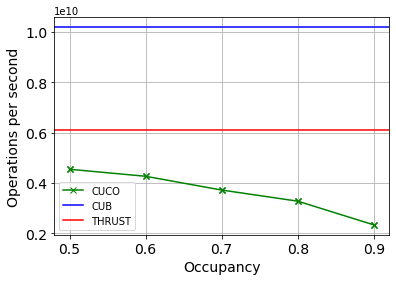

A100 I32/I32 SAME


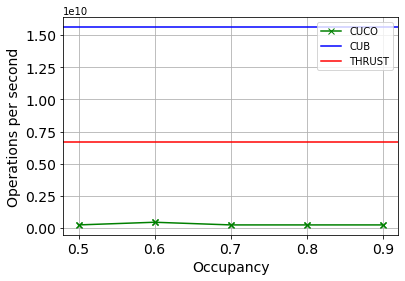

A100 I64/I64 UNIFORM


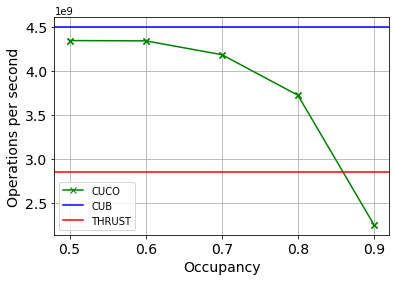

A100 I64/I64 GAUSSIAN


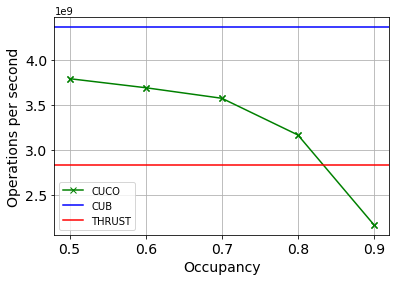

A100 I64/I64 UNIQUE


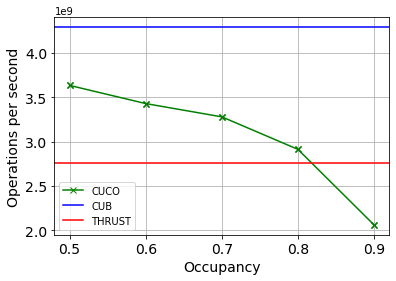

A100 I64/I64 SAME


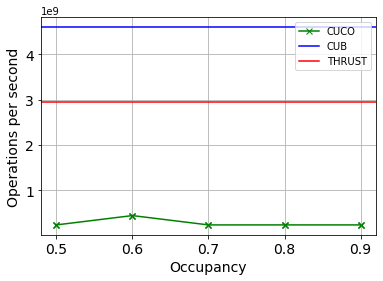

In [6]:
#### RBK
### A100
## Occupancy
# I32/I32
print("A100 I32/I32 UNIFORM")
query = 'Distribution == "UNIFORM" and\
         Key          == "I32" and\
         Value        == "I32" and\
         Benchmark.str.contains("occupancy|distribution")'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I32/I32 GAUSSIAN")
query = 'Distribution == "GAUSSIAN" and\
         Key          == "I32"      and\
         Value        == "I32"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I32/I32 UNIQUE")
query = 'Distribution == "UNIQUE" and\
         Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I32/I32 SAME")
query = 'Distribution == "SAME" and\
         Key          == "I32" and\
         Value        == "I32"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

# I64/I64
print("A100 I64/I64 UNIFORM")
query = 'Distribution == "UNIFORM" and\
         Key          == "I64" and\
         Value        == "I64" and\
         Benchmark.str.contains("occupancy|distribution")'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I64/I64 GAUSSIAN")
query = 'Distribution == "GAUSSIAN" and\
         Key          == "I64"      and\
         Value        == "I64"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I64/I64 UNIQUE")
query = 'Distribution == "UNIQUE" and\
         Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")

print("A100 I64/I64 SAME")
query = 'Distribution == "SAME" and\
         Key          == "I64" and\
         Value        == "I64"'
plot_bench(filter_bench(a100_dfs, query), "Occupancy")